### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style(style='darkgrid')

from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("flower.csv")

In [3]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
0,0.099138,0.112069,0.133621,0.137931,0.137931,0.137931,0.129310,0.116379,0.112069,0.120690,0.133621,0.146552,0.000862,0.000862,0.142241,0.125000,0.112069,0.107759,0.120690,0.137931,0.137931,0.133621,0.125000,0.103448,0.094828,0.086207,0.086207,0.099138,0.116379,0.120690,0.120690,0.116379,0.107759,0.107759,0.107759,0.107759,0.107759,0.094828,0.073276,0.047414,0.034483,0.025862,0.025862,0.030172,0.025862,0.025862,0.017241,0.021552,0.021552,0.030172
1,0.099138,0.107759,0.116379,0.137931,0.133621,0.129310,0.116379,0.103448,0.099138,0.107759,0.125000,0.133621,0.146552,0.000862,0.142241,0.125000,0.116379,0.112069,0.129310,0.129310,0.133621,0.129310,0.120690,0.103448,0.090517,0.086207,0.086207,0.107759,0.133621,0.137931,0.133621,0.133621,0.112069,0.107759,0.103448,0.103448,0.107759,0.099138,0.056034,0.038793,0.034483,0.025862,0.025862,0.030172,0.025862,0.017241,0.017241,0.012931,0.021552,0.034483
2,0.103448,0.112069,0.120690,0.120690,0.125000,0.120690,0.103448,0.103448,0.107759,0.112069,0.129310,0.137931,0.142241,0.142241,0.133621,0.116379,0.107759,0.107759,0.125000,0.125000,0.120690,0.125000,0.116379,0.099138,0.090517,0.099138,0.103448,0.116379,0.133621,0.142241,0.142241,0.129310,0.116379,0.103448,0.099138,0.103448,0.103448,0.077586,0.047414,0.043103,0.038793,0.034483,0.038793,0.034483,0.025862,0.017241,0.008621,0.012931,0.021552,0.038793
3,0.103448,0.116379,0.116379,0.120690,0.116379,0.107759,0.107759,0.103448,0.112069,0.116379,0.133621,0.129310,0.142241,0.133621,0.120690,0.107759,0.099138,0.107759,0.116379,0.116379,0.125000,0.120690,0.116379,0.099138,0.103448,0.125000,0.129310,0.129310,0.120690,0.129310,0.133621,0.116379,0.107759,0.099138,0.099138,0.090517,0.081897,0.068966,0.047414,0.047414,0.047414,0.043103,0.051724,0.051724,0.038793,0.025862,0.021552,0.017241,0.034483,0.060345
4,0.103448,0.107759,0.112069,0.112069,0.112069,0.112069,0.112069,0.116379,0.116379,0.125000,0.129310,0.137931,0.133621,0.129310,0.116379,0.107759,0.099138,0.107759,0.116379,0.116379,0.125000,0.103448,0.081897,0.103448,0.125000,0.142241,0.000862,0.146552,0.142241,0.137931,0.129310,0.112069,0.107759,0.103448,0.099138,0.086207,0.073276,0.073276,0.056034,0.060345,0.064655,0.056034,0.060345,0.060345,0.047414,0.034483,0.025862,0.030172,0.060345,0.077586
5,0.112069,0.103448,0.103448,0.116379,0.116379,0.116379,0.116379,0.120690,0.125000,0.125000,0.133621,0.137931,0.129310,0.120690,0.120690,0.107759,0.107759,0.120690,0.125000,0.116379,0.103448,0.229310,0.457759,0.087069,0.120690,0.146552,0.000862,0.146552,0.005172,0.146552,0.133621,0.116379,0.112069,0.112069,0.107759,0.094828,0.081897,0.073276,0.068966,0.073276,0.073276,0.068966,0.073276,0.068966,0.047414,0.038793,0.030172,0.047414,0.073276,0.090517
6,0.112069,0.107759,0.112069,0.120690,0.116379,0.116379,0.112069,0.120690,0.125000,0.129310,0.129310,0.125000,0.129310,0.116379,0.116379,0.107759,0.116379,0.133621,0.133621,0.116379,0.125000,0.625862,1.000000,0.475000,0.103448,0.112069,0.133621,0.056897,0.005172,0.125000,0.112069,0.116379,0.116379,0.112069,0.116379,0.103448,0.086207,0.068966,0.073276,0.073276,0.073276,0.081897,0.077586,0.060345,0.047414,0.043103,0.038793,0.051724,0.081897,0.112069
7,0.112069,0.112069,0.125000,0.129310,0.116379,0.107759,0.107759,0.116379,0.125000,0.129310,0.120690,0.129310,0.129310,0.120690,0.116379,0.112069,0.125000,0.137931,0.146552,0.013793,0.133621,0.595690,0.974138,0.810345,0.142241,0.250862,0.548276,0.866379,0.367241,0.225000,0.104310,0.000862,0.116379,0.120690,0.116379,0.112069,0.090517,0.068966,0.073276,0.073276,0.081897,0.077586,0.068966,0.051724,0.047414,0.038793,0.038793,0.056034,0.099138,0.125000
8,0.120690,0.116379,0.116379,0.120690,0.107759,0.103448,0.112069,0.116379,0.120690,0.125000,0.125000,0.125000,0.129310,0.133621,0.142241,0.018103,0.069828,0.133621,0.134483,0.367241,0.120690,0

In [4]:
X = df.iloc[:,0:]

In [5]:
X.values

array([[0.09913793, 0.11206897, 0.13362069, ..., 0.02155172, 0.02155172,
        0.03017241],
       [0.09913793, 0.10775862, 0.11637931, ..., 0.01293103, 0.02155172,
        0.03448276],
       [0.10344828, 0.11206897, 0.12068966, ..., 0.01293103, 0.02155172,
        0.0387931 ],
       ...,
       [0.12931034, 0.14224138, 0.0137931 , ..., 0.08189655, 0.06896552,
        0.05603448],
       [0.12931034, 0.14224138, 0.02241379, ..., 0.10344828, 0.09482759,
        0.10775862],
       [0.125     , 0.13793103, 0.00948276, ..., 0.13793103, 0.13793103,
        0.00517241]])

### Use Dendogram

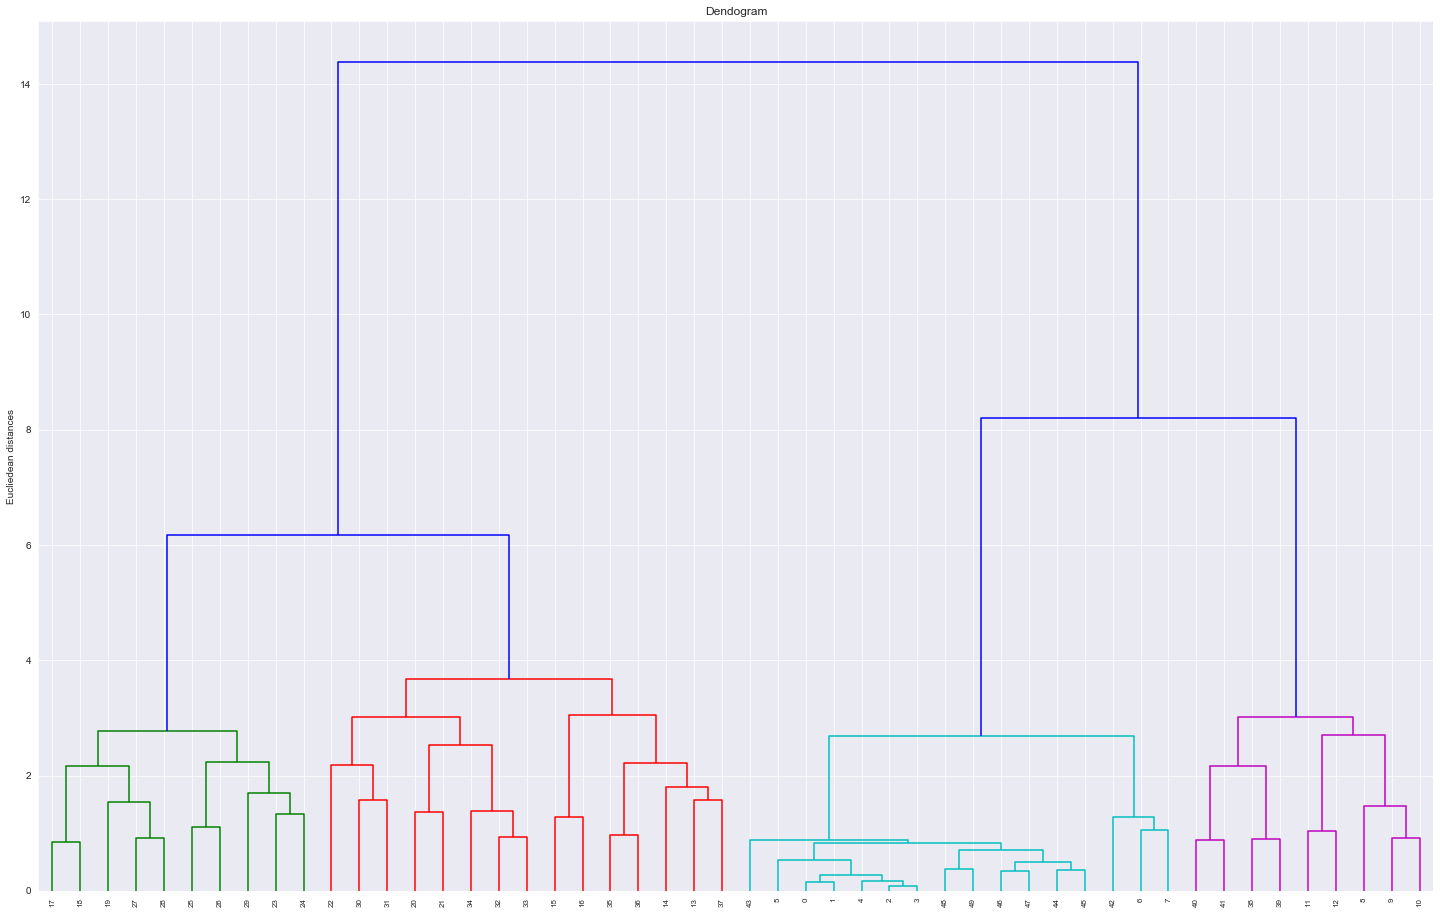

In [6]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='level',color_threshold=4)
plt.title("Dendogram")
plt.xlabel("")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [7]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [8]:
y_hc = hc.fit_predict(X)

In [9]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

### Visualising the clusters